In [5]:
import numpy as np
import pandas as pd

In [6]:
data = pd.read_csv('/content/HY_Universe_corporate bond.csv')

In [7]:
data.head()

,CUSIP,Ticker,Issue Date,Maturity,1st Call Date,Moodys,S_and_P,Fitch,Bloomberg Composite Rating,Coupon,...,percent_intra_dealer,percent_uncapped,bond_type,Client_Trade_Percentage,weekly_mean_volume,weekly_median_volume,weekly_max_volume,weekly_min_volume,weekly_mean_ntrades,weekly_median_ntrades
0,000324AA1,FLECIN,7/1/2014,7/1/2019,10/23/2017,Nan,Nan,Nan,Nan,12.00,...,0.006645,0.292359,5,0.521595,3105926.765,2000000.0,18980000.0,60000.0,3.541176,1
1,00080QAB1,RBS,3/15/2004,6/4/2018,Nan,Ba1,BB+,BBB,BB+,4.65,...,0.425018,0.974071,2,0.337071,1721696.774,1160000.0,11197000.0,5000.0,18.412903,3
2,00081TAD0,ACCO,5/14/2010,3/15/2015,Nan,WR,NR,BB+,NR,10.63,...,0.115207,0.594470,5,0.467742,4200313.433,3520000.0,14000000.0,24000.0,6.477612,1
3,00081TAH1,ACCO,6/17/2013,4/30/2020,Nan,WR,NR,WD,NR,6.75,...,0.426332,0.892462,3,0.212864,6321559.783,5487500.0,18459000.0,30000.0,27.038043,1
4,00081TAJ7,ACCO,12/22/2016,12/15/2024,12/15/2019,B1,BB-,BB,BB-,5.25,...,0.157216,0.690722,5,0.500000,5936714.286,3305500.0,72760000.0,90000.0,9.238095,1


In [8]:
data['Industry']

0                    Real Estate
1                          Banks
2       Household Products/Wares
3       Household Products/Wares
4       Household Products/Wares
                  ...           
2716                    Electric
2717                    Electric
2718                       Media
2719                    Electric
2720                    Electric
Name: Industry, Length: 2721, dtype: object

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2721 entries, 0 to 2720
Data columns (total 37 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CUSIP                       2721 non-null   object 
 1   Ticker                      2721 non-null   object 
 2   Issue Date                  2721 non-null   object 
 3   Maturity                    2721 non-null   object 
 4   1st Call Date               2721 non-null   object 
 5   Moodys                      2721 non-null   object 
 6   S_and_P                     2721 non-null   object 
 7   Fitch                       2721 non-null   object 
 8   Bloomberg Composite Rating  2721 non-null   object 
 9   Coupon                      2721 non-null   float64
 10  Issued Amount               2721 non-null   float64
 11  Maturity Type               2721 non-null   object 
 12  Coupon Type                 2721 non-null   object 
 13  Maturity At Issue months    2721 

In [10]:
rows = len(data)
cols = len(data.columns)
print("Number of Rows: ", rows)
print("Number of Columns: ", cols)

Number of Rows:  2721
Number of Columns:  37


In [11]:
labels = list(data.columns)
n = []
s = []
o = []

for label in labels:
    N = 0
    S = 0
    O = 0

    for i in data[label]:
        if type(i) == str:
            S += 1
        elif (type(i) == int) or (type(i) == float):
            N += 1
        else:
            O += 1
    n.append(N)
    s.append(S)
    o.append(O)

Output = {
    "Label": labels,
    "Number": n,
    "String": s,
    "Other": o
}
Output = pd.DataFrame(Output)
Output

,Label,Number,String,Other
0,CUSIP,0,2721,0
1,Ticker,0,2721,0
2,Issue Date,0,2721,0
3,Maturity,0,2721,0
4,1st Call Date,0,2721,0
5,Moodys,0,2721,0
6,S_and_P,0,2721,0
7,Fitch,0,2721,0
8,Bloomberg Composite Rating,0,2721,0
9,Coupon,2721,0,0


In [12]:
# Categorical : Industry (col 29)   Numerical :Issue amount (col 10)
#Calculating Mean, Variance and standard deviation for Numerical data :Issue Amount
num = np.array(data['Issued Amount'])
m = num.mean()
v = num.var()
s = num.std()

print ("Mean =", m," Variance =",v," Standard Deviation =",s)

Mean = 829929536.9676957  Variance = 3.365999113598244e+17  Standard Deviation = 580172311.783167


In [13]:
#Quantile Calculation for Numerical Data : Issue Amount
q1 = np.quantile(num, 0)
q2 = np.quantile(num, 0.25)
q3 = np.quantile(num, 0.50)
q4 = np.quantile(num, 0.75)
q5 = np.quantile(num, 1)
q=np.array([q1,q2,q3,q4,q5])
print("The four percentiles are ",q)

The four percentiles are  [3.70000000e+08 5.00000000e+08 6.50000000e+08 1.00000000e+09
 7.36402618e+09]


In [14]:
#Analysing Categorical Data
#Calculating the number of each category
cat = list(data['Industry'])
cat_label = list(set(cat))
print("There are ",len(cat_label)," many industries")
print("The type of industries are : ", cat_label)

There are  69  many industries
The type of industries are :  ['Computers', 'REITS', 'Beverages', 'Office/Business Equip', 'Commercial Services', 'Oil Gas', 'Distribution/Wholesale', 'Hand/Machine Tools', 'Packaging Containers', 'Semiconductors', 'Building Materials', 'Cosmetics/Personal Care', 'Sovereign', 'Savings Loans', 'Airlines', 'Electrical Compo Equip', 'Gas', 'Diversified Finan Serv', 'Home Builders', 'Retail', 'Iron/Steel', 'Apparel', 'Advertising', 'Housewares', 'Miscellaneous Manufactur', 'Pharmaceuticals', 'Coal', 'Oil Gas Services', 'Machinery-Diversified', 'Holding Companies-Divers', 'Forest Products Paper', 'Mining', 'Biotechnology', 'Agriculture', 'Lodging', 'Energy-Alternate Sources', 'Telecommunications', 'Media', 'Internet', 'Machinery-Constr Mining', 'Real Estate', 'Leisure Time', 'Aerospace/Defense', 'Transportation', 'Environmental Control', 'Trucking Leasing', 'Auto Parts Equipment', 'Food Service', 'Healthcare-Products', 'Storage/Warehousing', 'Investment Compan

In [15]:
#Counting data in each of the category

cat_count = []
for i in cat_label:
  cat_count.append(sum(data["Industry"] == i))
Output = {
    "Industry" : cat_label,
    "Count" : cat_count
}
Output = pd.DataFrame(Output)
Output

,Industry,Count
0,Computers,30
1,REITS,43
2,Beverages,22
3,Office/Business Equip,9
4,Commercial Services,76
...,...,...
64,Chemicals,55
65,Engineering Construction,17
66,Insurance,37
67,Regional(state/provnc),5


In [16]:
#qq plot : to show which attribute most closely show gaussian distribution
import pylab
import scipy.stats as stats

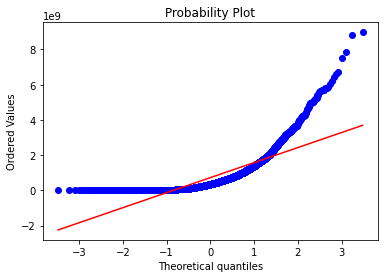

In [17]:
stats.probplot(data['volume_trades'], dist="norm", plot=pylab)
pylab.show()

Volume of trade has heavy tails

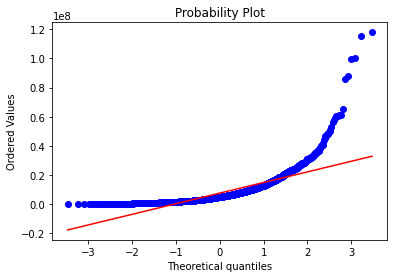

In [18]:
stats.probplot(data['weekly_mean_volume'], dist="norm", plot=pylab)
pylab.show()

Weekly mean volume has better fit than volume of trades 

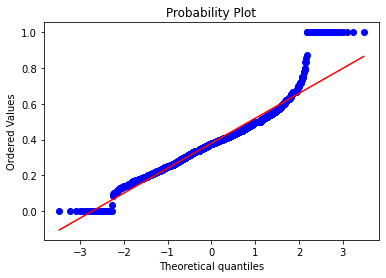

In [19]:
stats.probplot(data['Client_Trade_Percentage'], dist="norm", plot=pylab)
pylab.show()

It is shows gaussian distribution with some outlier values

In [20]:
#Statistical Summary of all attributes
summary = data.describe()
print(summary)

            Coupon  Issued Amount  Maturity At Issue months  LiquidityScore  \
count  2721.000000   2.721000e+03               2721.000000     2721.000000   
mean     10.307872   8.299295e+08                113.968997       18.218230   
std      63.051382   5.802790e+08                101.893176        7.872071   
min       0.000000   3.700000e+08                 11.930000        4.388758   
25%       5.000000   5.000000e+08                 65.170000       12.738630   
50%       6.250000   6.500000e+08                 97.370000       16.538471   
75%       7.750000   1.000000e+09                121.770000       22.120108   
max     999.000000   7.364026e+09               1217.570000       54.673908   

         LIQ SCORE      n_trades  volume_trades  total_median_size  \
count  2721.000000   2721.000000   2.721000e+03       2.721000e+03   
mean      0.182182   2700.696435   7.222372e+08       5.361476e+05   
std       0.078721   5572.262205   1.027825e+09       4.193546e+05   
min     

In [21]:
import matplotlib.pyplot as plt


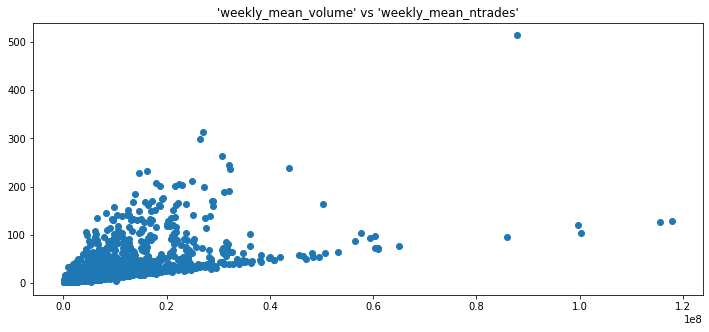

In [22]:
plt.figure(figsize=[12,5])
plt.scatter(data['weekly_mean_volume'], data['weekly_mean_ntrades'])
plt.title("'weekly_mean_volume' vs 'weekly_mean_ntrades'")
plt.show()

weekly mean volume and weekly mean n trade show a linear relationship but the variance is high.

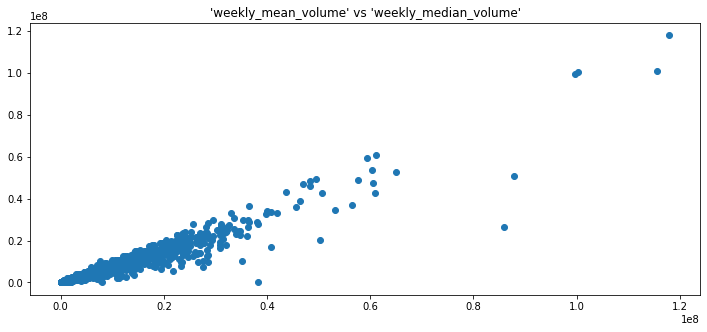

In [23]:
plt.figure(figsize=[12,5])
plt.scatter(data['weekly_mean_volume'], data['weekly_median_volume'])
plt.title("'weekly_mean_volume' vs 'weekly_median_volume'")
plt.show()

weekly mean volume and weekly median volume show better linear relationship with lesser variance than before.

In [24]:
#Calculating correlation among every attribute
data.corr()

,Coupon,Issued Amount,Maturity At Issue months,LiquidityScore,LIQ SCORE,n_trades,volume_trades,total_median_size,total_mean_size,n_days_trade,...,percent_intra_dealer,percent_uncapped,bond_type,Client_Trade_Percentage,weekly_mean_volume,weekly_median_volume,weekly_max_volume,weekly_min_volume,weekly_mean_ntrades,weekly_median_ntrades
Coupon,1.000000,-0.014238,0.098844,-0.042302,-0.042302,-0.023330,-0.026717,0.044601,0.026891,-0.028336,...,-0.014316,-0.045897,0.051856,0.029125,-0.027724,-0.028584,-0.026362,-0.014438,-0.028045,-0.018326
Issued Amount,-0.014238,1.000000,0.008601,0.134930,0.134930,0.156948,0.326310,0.062343,0.078362,0.068113,...,0.052617,-0.112369,-0.070714,-0.049513,0.382050,0.396947,0.261469,0.105208,0.274420,0.188765
Maturity At Issue months,0.098844,0.008601,1.000000,0.072507,0.072507,0.038839,-0.015227,-0.115086,-0.138581,0.029530,...,0.104127,0.100168,0.102990,-0.040186,-0.023002,-0.032868,-0.017137,-0.020392,0.036729,0.006573
LiquidityScore,-0.042302,0.134930,0.072507,1.000000,1.000000,0.803139,0.786718,-0.627008,-0.656980,0.873040,...,0.671903,0.666321,-0.368492,-0.496127,0.385978,0.371213,0.481142,0.025707,0.673569,0.239951
LIQ SCORE,-0.042302,0.134930,0.072507,1.000000,1.000000,0.803139,0.786718,-0.627008,-0.656980,0.873040,...,0.671903,0.666321,-0.368492,-0.496127,0.385978,0.371213,0.481142,0.025707,0.673569,0.239951
n_trades,-0.023330,0.156948,0.038839,0.803139,0.803139,1.000000,0.769322,-0.425801,-0.468673,0.704310,...,0.415695,0.396880,-0.208283,-0.348408,0.309053,0.285998,0.432955,-0.041335,0.804753,0.234165
volume_trades,-0.026717,0.326310,-0.015227,0.786718,0.786718,0.769322,1.000000,-0.276204,-0.278564,0.772564,...,0.387555,0.241814,-0.452584,-0.327922,0.503159,0.479018,0.616802,-0.037198,0.602055,0.144272
total_median_size,0.044601,0.062343,-0.115086,-0.627008,-0.627008,-0.425801,-0.276204,1.000000,0.930213,-0.490428,...,-0.650101,-0.826443,0.081332,0.486900,0.060608,0.053381,-0.066253,0.138658,-0.378970,-0.096283
total_mean_size,0.026891,0.078362,-0.138581,-0.656980,-0.656980,-0.468673,-0.278564,0.930213,1.000000,-0.494483,...,-0.679317,-0.862401,0.086759,0.502385,0.052018,0.054723,-0.087748,0.177104,-0.428501,-0.100327
n_days_trade,-0.028336,0.068113,0.029530,0.873040,0.873040,0.704310,0.772564,-0.490428,-0.494483,1.000000,...,0.500944,0.433119,-0.444068,-0.406258,0.168114,0.169430,0.323094,-0.118874,0.416313,0.026527


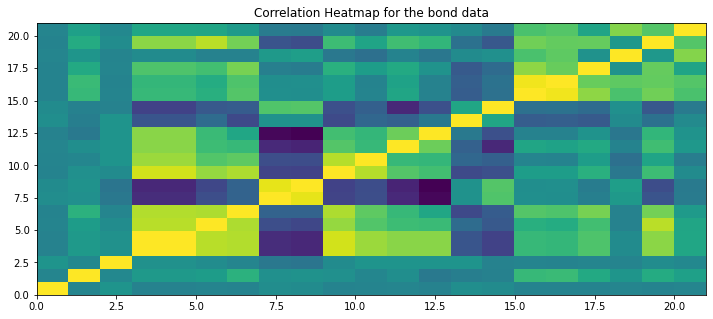

In [25]:
#calculate Correlation Matrix
corrMat = pd.DataFrame(data.corr())
#visualize correlations using heatmap
plt.figure(figsize=[12,5])
plt.title("Correlation Heatmap for the bond data")
plt.pcolor(corrMat)
plt.show()

In [26]:
data.columns[5:9]

Index(['Moodys', 'S_and_P', 'Fitch', 'Bloomberg Composite Rating'], dtype='object')

In [27]:
data_rating = data[['Moodys','S_and_P','Fitch','Bloomberg Composite Rating']]
data_rating = data_rating.astype("category")
data_rating.describe() 

,Moodys,S_and_P,Fitch,Bloomberg Composite Rating
count,2721,2721,2721,2721
unique,45,41,39,28
top,WR,NR,Nan,NR
freq,1039,1009,1170,1136


Checking if rating system are consistent. Or checking the correaltion between rating by Moody's and S&P.

In [28]:
Moody_rating = data_rating['Moodys']
data_rating['Moodys'].value_counts()
# Moody_rating

WR          1039
Ba1          216
Ba3          178
B1           165
Ba2          163
Nan          161
B3           149
Baa3         124
B2            89
Caa1          80
Caa2          61
Aa3           46
Baa2          35
A1            32
Aa2           27
Ca            24
Caa3          13
Baa1          13
A2            13
Aaa           12
Ba2 /*+       10
Ba3 /*-       10
NR             9
Ba1 /*+        8
C              6
B3 /*+         6
B1 /*-         5
Ba1u           4
Caa1 /*+       3
Baa3 /*+       2
(P)B3          2
Ba3e           2
A1 /*-         2
Baa1e          1
Baa1 /*+       1
(P)Caa1        1
Ba1 /*-        1
Caa1 /*-       1
Caa1u          1
B1e            1
Aa1            1
Caa3 /*+       1
Cau            1
A3             1
Ba2 /*-        1
Name: Moodys, dtype: int64

In [29]:
# Aaa=1, Aa=2, A=3, Baa=4, Ba=5, B=6, Caa=7, Ca=8, C=9, (NR,Nan and WR) =0
Moody_rating = Moody_rating.replace(['Ba1','Ba3','Ba1 /*+','Ba2','Ba2 /*+','Ba2 /*-','Ba2 /*- ','Ba3 /*-','Ba1u','Ba3e','Ba1 /*+ ','Ba3e','Ba1 /*-','Ba2 /*- '],5)
Moody_rating = Moody_rating.replace(['B1','B3','B2','B1 /*+','B3 /*-','(P)B3','B1 /*+','B3 /*+','B1 /*-','B1e'],6)
Moody_rating = Moody_rating.replace(['Baa3','Baa2','Baa1','Baa3 /*+','Baa1e','Baa1 /*+'],4)
Moody_rating = Moody_rating.replace(['Aaa'],1)
Moody_rating = Moody_rating.replace(['Caa1','Caa2','Caa3','Caa1 /*+','Caa1 /*-','Caa1u','Caa3 /*+','(P)Caa1'],7)
Moody_rating = Moody_rating.replace(['Aa3','Aa2','Aa1'],2)
Moody_rating = Moody_rating.replace(['A1','A2','A1 /*-','A3'],3)
Moody_rating = Moody_rating.replace(['Ca','Cau'],8)
Moody_rating = Moody_rating.replace(['C'],9)
Moody_rating = Moody_rating.replace(['WR','Nan','NR'],0)

In [30]:
Moody_rating.value_counts()

0    1209
5     593
6     417
4     176
7     161
2      74
3      48
8      25
1      12
9       6
Name: Moodys, dtype: int64

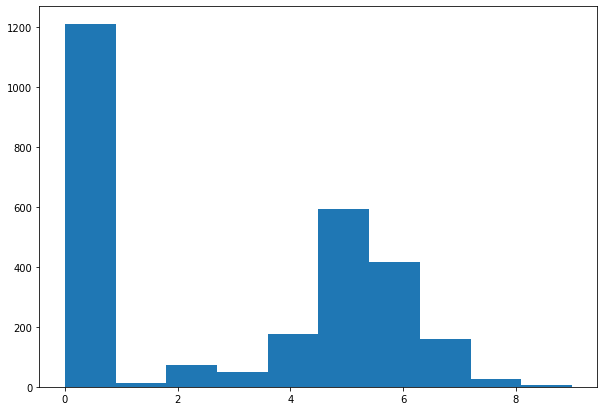

In [31]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(Moody_rating)
# Show plot
plt.show()

In [32]:
S_and_P_rating = data_rating['S_and_P']
data_rating['S_and_P'].value_counts()

NR          1009
BB+          214
BB           202
BBB-         188
Nan          186
BB-          166
B+           126
B            111
B-            85
BBB           81
CCC+          55
AA-           55
CCC           33
A             27
CCC-          27
AA            20
BB /*-        15
BB- /*+       14
BBB+          13
CC            13
A+            10
D             10
AAA            8
BBB+ /*-       7
C              7
A-             7
AA+            6
BBB- /*-       4
B- /*+         3
CCC /*-        3
CCC+ /*+       2
BB+ /*-        2
C /*-          2
(P)BB-         2
B /*+          2
BBu            1
BB+ /*+        1
CCC+ /*-       1
BB /*+         1
(P)BBB+        1
(P)BB          1
Name: S_and_P, dtype: int64

In [33]:
# AAA=1, AA=2, A=3, BBB=4, BB=5, B=6, CCC=7, CC=8, C and D=9, (NR and Nan) =0
S_and_P_rating = S_and_P_rating.replace(['BB+','BB','BB-','BB /*-','BB- /*+','BB+ /*-','(P)BB-','BBu','BB+ /*+','BB /*+','(P)BB'],5)
S_and_P_rating = S_and_P_rating.replace(['B+','B-','B','B- /*+','B /*+'],6)
S_and_P_rating = S_and_P_rating.replace(['BBB-','BBB','BBB+','BBB+ /*-','Baa1e','BBB- /*-','(P)BBB+'],4)
S_and_P_rating = S_and_P_rating.replace(['AAA'],1)
S_and_P_rating = S_and_P_rating.replace(['CCC+','CCC-','CCC','CCC /*-','CCC+ /*+','CCC+ /*-'],7)
S_and_P_rating = S_and_P_rating.replace(['AA-','AA','AA+'],2)
S_and_P_rating = S_and_P_rating.replace(['A','A+','A-'],3)
S_and_P_rating = S_and_P_rating.replace(['CC'],8)
S_and_P_rating = S_and_P_rating.replace(['C','D','C /*-'],9)
S_and_P_rating = S_and_P_rating.replace(['Nan','NR'],0)

In [34]:
S_and_P_rating.value_counts()

0    1195
5     619
6     327
4     294
7     121
2      81
3      44
9      19
8      13
1       8
Name: S_and_P, dtype: int64

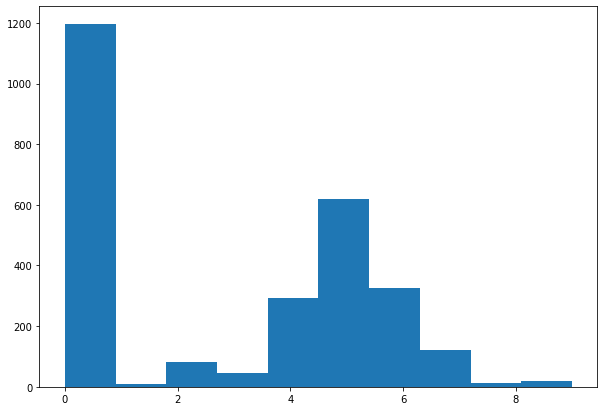

In [35]:
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(S_and_P_rating)
# Show plot
plt.show()

Text(0, 0.5, 'S & P Rating')

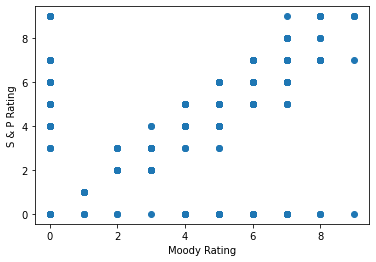

In [36]:
plt.scatter(Moody_rating, S_and_P_rating)
plt.xlabel('Moody Rating')
plt.ylabel('S & P Rating')